In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [41]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [42]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
import matplotlib.pyplot as plt

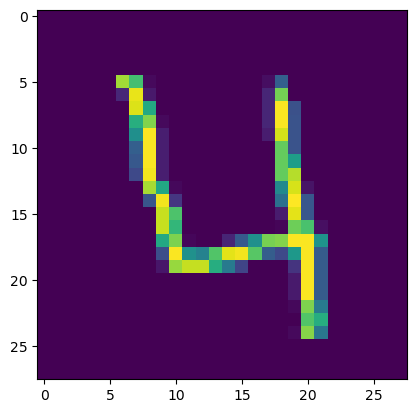

In [44]:
plt.imshow(df.iloc[3,1:].values.reshape(28,28))

In [68]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
X_train.shape

(33600, 784)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()

In [73]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [74]:
import time
start = time.time()
y_prediction = knn.predict(X_test)
print(time.time() - start)

13.193160772323608


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(Y_test, y_prediction)

0.9648809523809524

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
# mean centering
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [105]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [106]:
X_test_trf.shape

(8400, 784)

In [107]:
X_train_trf.shape

(33600, 784)

In [108]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf, Y_train)

KNeighborsClassifier()

In [109]:
Y_prediction = knn.predict(X_test_trf)

In [110]:
accuracy_score(Y_test, Y_prediction)

0.9391666666666667

In [111]:
# eigen values of 100 as chosen for PCA
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [112]:
# eigen vectors
pca.components_.shape

(784, 784)

In [95]:
# variance ratio
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239, 0.02966263, 0.02581562,
       0.0225498 , 0.01973068, 0.0177528 , 0.01568651, 0.01436063,
       0.01370255, 0.01227255, 0.01146912, 0.01123027, 0.01058528,
       0.0101993 , 0.00957675, 0.00942707, 0.00912487, 0.00890167,
       0.00839937, 0.00820061, 0.00785298, 0.00756736, 0.00737253,
       0.0070188 , 0.00697908, 0.0067109 , 0.0063981 , 0.00630314,
       0.00615311, 0.00602337, 0.00583655, 0.00578456, 0.00572271,
       0.00546307, 0.00543139, 0.00528037, 0.00513262, 0.00493747,
       0.00487469, 0.00481772, 0.00468008, 0.00459183, 0.00457457,
       0.00449014, 0.00444438, 0.0044121 , 0.00434601, 0.00431592,
       0.00421316, 0.00417589, 0.0040738 , 0.00401121, 0.00397802,
       0.00393993, 0.00386159, 0.0038224 , 0.00375418, 0.0037264 ,
       0.00363463, 0.00359406, 0.00353055, 0.00346343, 0.00342382,
       0.0033615 , 0.00331893, 0.00329916, 0.00323061, 0.00319141,
       0.00315148, 0.00308014, 0.00307037, 0.00302619, 0.00301

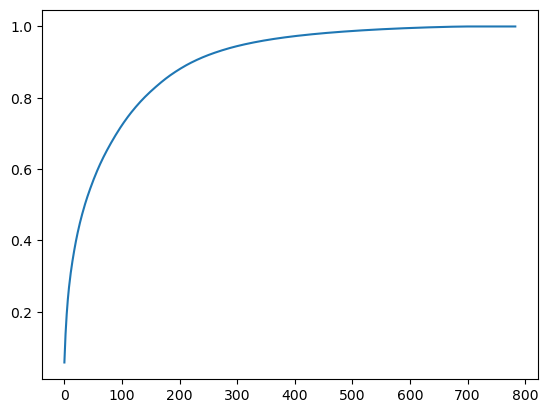

In [113]:
# stop where values gets > 0.9
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [114]:
pca.components_.shape

(784, 784)

In [115]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      